In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/praktikum05ml'

In [ ]:
# --- Import library ---
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Load dataset Iris ---
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# --- Split data: 80% training, 20% testing ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Buat model Decision Tree ---
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# --- Prediksi dan evaluasi model ---
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# --- Tampilkan confusion matrix dalam bentuk angka ---
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# --- Cari max_depth terbaik secara sederhana ---
scores = {}
for d in range(1, 11):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

best_d = max(scores, key=scores.get)
print("\nBest max_depth:", best_d, "| Accuracy:", round(scores[best_d]*100, 2), "%")


Accuracy: 93.33%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Best max_depth: 3 | Accuracy: 96.67 %


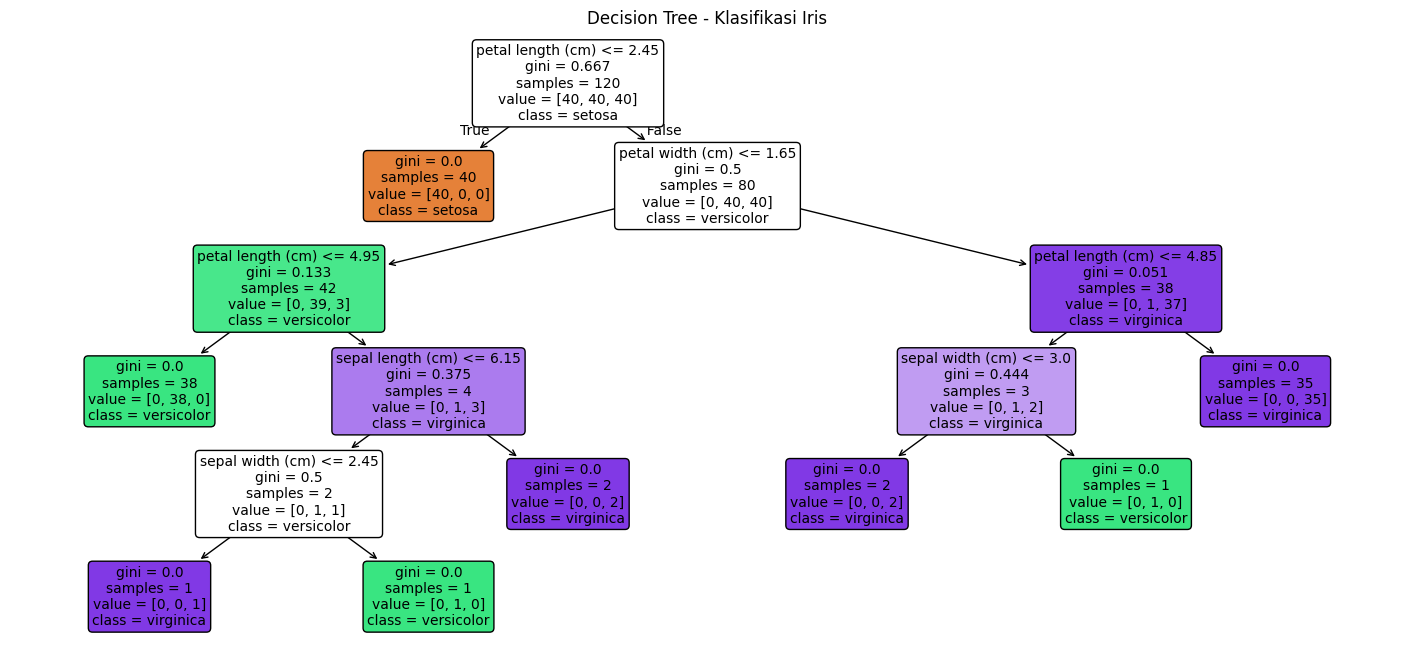

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# --- Visualisasi Struktur Tree ---
plt.figure(figsize=(18,8))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=[str(c) for c in iris.target_names],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree - Klasifikasi Iris")
plt.show()


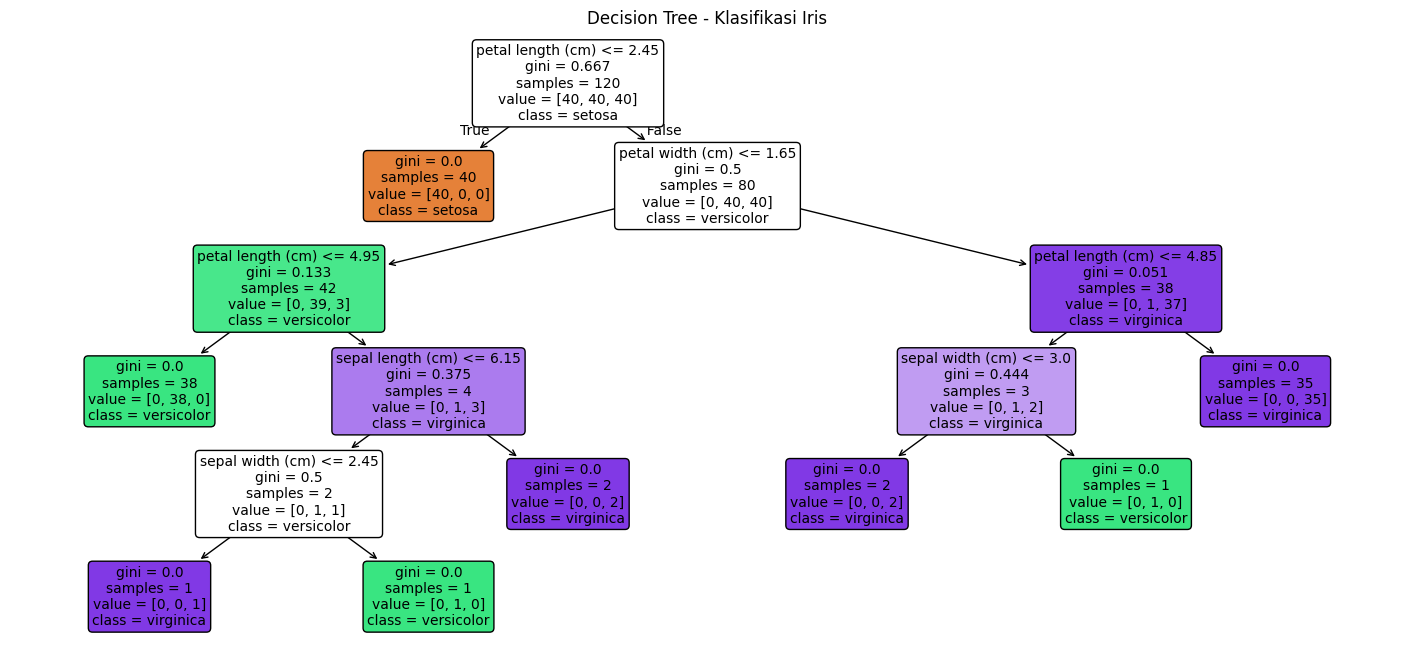

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# --- Visualisasi Struktur Pohon Keputusan ---
plt.figure(figsize=(18,8))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=[str(c) for c in iris.target_names],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree - Klasifikasi Iris")
plt.show()
